In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from analysis_modules import *

In [15]:
count_data=read_csv('../test_dataset/GSE228582_raw_counts_GRCh38.p13_NCBI.tsv.gz')
meta_df = read_csv('../test_dataset/GSE228582_metadata.csv')

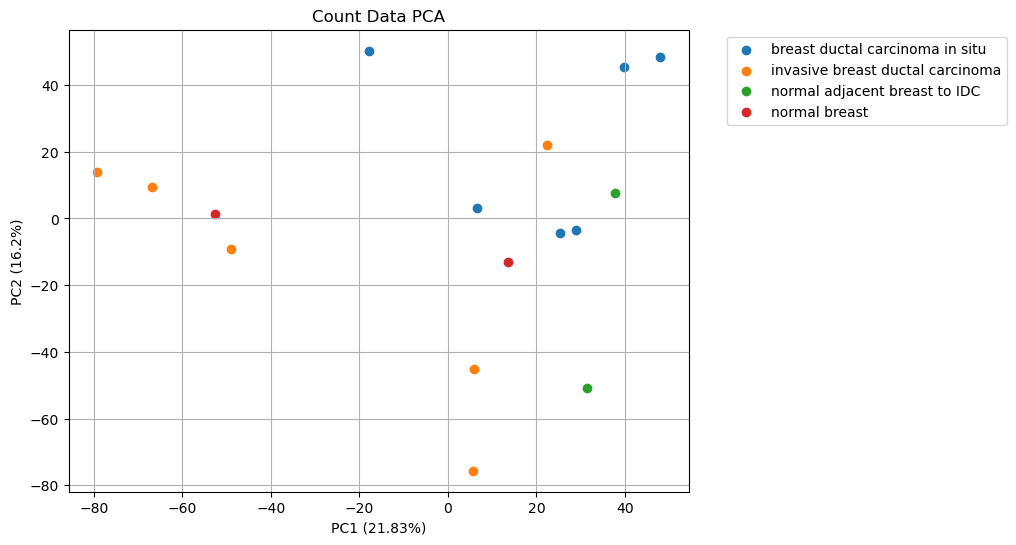

In [17]:
pca_df = plot_count_pca(count_data,
               meta_df=meta_df,
               col1='condition',
               col2=None,
               log=True)

In [11]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri, default_converter
from rpy2.robjects.conversion import localconverter



In [13]:
base = importr('base')
utils = importr('utils')
deseq2 = importr('DESeq2')

In [26]:
count_df = read_csv("../../deseq_test/filtered_counts.csv")
meta_df = read_csv("../../deseq_test/filtered_metadata.csv")
meta_df['group'] = pd.Categorical(meta_df['group'], categories=['Healthy', 'Diseased'])


In [27]:
with localconverter(default_converter + pandas2ri.converter):
    r_counts_df = pandas2ri.py2rpy(count_df)
    r_meta_df = pandas2ri.py2rpy(meta_df)

dds = deseq2.DESeqDataSetFromMatrix(
    countData=r_counts_df,
    colData=r_meta_df,
    design=ro.Formula('~ group')
)

dds = deseq2.DESeq(dds)

R callback write-console: estimating size factors
  
R callback write-console: estimating dispersions
  
R callback write-console: gene-wise dispersion estimates
  
R callback write-console: mean-dispersion relationship
  
R callback write-console: final dispersion estimates
  
R callback write-console: fitting model and testing
  
R callback write-console: -- replacing outliers and refitting for 155 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
  
R callback write-console: estimating dispersions
  
R callback write-console: fitting model and testing
  


In [29]:
res = deseq2.results(dds)

In [32]:
res_df_r = base.as_data_frame(res)

In [33]:
with localconverter(default_converter + pandas2ri.converter):
    res_df = pandas2ri.rpy2py(res_df_r)

In [35]:
res_df.sort_values('padj').head(10)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
23768,2577.696427,4.673761,0.395814,11.807962,3.550620e-32,7.297590e-28
4311,1416.897616,6.515041,0.573309,11.363930,6.323452e-30,6.498296e-26
107985728,244.360699,2.886812,0.254965,11.322396,1.016547e-29,6.964363e-26
148398,678.433065,2.230186,0.197786,11.275748,1.729019e-29,8.884134e-26
57154,1201.155196,-0.751829,0.067346,-11.163671,6.140279e-29,2.524023e-25
1002,390.877288,3.771355,0.341351,11.048322,2.233517e-28,7.650912e-25
2043,172.364944,4.381679,0.397244,11.030201,2.732524e-28,8.023082e-25
6422,2184.443493,8.428072,0.773287,10.899016,1.165101e-27,2.993290e-24
624,274.645965,5.209592,0.519681,10.024590,1.188516e-23,2.714173e-20
89927,1751.711506,-1.726406,0.173692,-9.939469,2.803181e-23,5.761378e-20
